In [0]:
!pip install gdown
import gdown

  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 78 kB 4.5 MB/s 
     |████████████████████████████████| 128 kB 14.7 MB/s 
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14830 sha256=b33dc98ed2e7df88dddde67a04cd59009cd910cb44da4390bbeac2dd555117ef
  Stored in directory: /root/.cache/pip/wheels/2e/bf/38/838f7a301971b6fa2915069198ae7b48a21833d156ef170960
Successfully built gdown
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
url = 'https://drive.google.com/u/1/uc?id=1DJ2iFnW_-njawLdLDmHQEpnB1UpLB95Y&export=download&confirm=t&uuid=52bcb147-21e1-4f08-a5cb-5a654e754490'
output = 'archive.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/1/uc?id=1DJ2iFnW_-njawLdLDmHQEpnB1UpLB95Y&export=download&confirm=t&uuid=52bcb147-21e1-4f08-a5cb-5a654e754490
To: /databricks/driver/archive.zip
100%|██████████| 716M/716M [00:05<00:00, 127MB/s]
Out[2]: 'archive.zip'

### Extraindo o Arquivo

In [0]:
from zipfile import ZipFile
 
z = ZipFile('archive.zip', 'r')
z.extractall()
z.close()

### Verificando se os 4 arquivos txt foram extraidos corretamente

In [0]:
ls

README               combined_data_4.txt          metastore_db/
archive.zip          conf/                        movie_titles.csv
azure/               eventlogs/                   preload_class.lst*
combined_data_1.txt  ganglia/                     probe.txt
combined_data_2.txt  hadoop_accessed_config.lst*  qualifying.txt
combined_data_3.txt  logs/


### Criando CSV para armazenar os dados do ETL

In [0]:
csv = open("data.csv", 'a')
csv.write("movieID,customerID,rating,data\n")

Out[5]: 31

### Lendo os dados de cada arquivo txt e tratando-os/salvando-os em csv

In [0]:
dados = open("combined_data_1.txt")
 
movieID = None
for d in dados:
  if ":" in d:
    movieID = int(d.split(":")[0])
  else:
    s = f'{movieID},{d}'
    csv.write(s)

In [0]:
dados = open("combined_data_2.txt")
 
movieID = None
for d in dados:
  if ":" in d:
    movieID = int(d.split(":")[0])
  else:
    s = f'{movieID},{d}'
    csv.write(s)

In [0]:
dados = open("combined_data_3.txt")
 
movieID = None
for d in dados:
  if ":" in d:
    movieID = int(d.split(":")[0])
  else:
    s = f'{movieID},{d}'
    csv.write(s)

In [0]:
dados = open("combined_data_4.txt")
 
movieID = None
for d in dados:
  if ":" in d:
    movieID = int(d.split(":")[0])
  else:
    s = f'{movieID},{d}'
    csv.write(s)

In [0]:
csv.close()

### Movendo o arquivo já com todos os dados integrados para o DBFS

In [0]:
dbutils.fs.mv('file:///databricks/driver/data.csv','dbfs:///netflix/data.csv')

Out[11]: True

In [0]:
df = spark.read.csv('dbfs:///netflix/data.csv', header = True, inferSchema='True')

In [0]:
df.count()

Out[13]: 100480507

In [0]:
df.display()

movieID,customerID,rating,data
1,1488844,3,2005-09-06T00:00:00.000+0000
1,822109,5,2005-05-13T00:00:00.000+0000
1,885013,4,2005-10-19T00:00:00.000+0000
1,30878,4,2005-12-26T00:00:00.000+0000
1,823519,3,2004-05-03T00:00:00.000+0000
1,893988,3,2005-11-17T00:00:00.000+0000
1,124105,4,2004-08-05T00:00:00.000+0000
1,1248029,3,2004-04-22T00:00:00.000+0000
1,1842128,4,2004-05-09T00:00:00.000+0000
1,2238063,3,2005-05-11T00:00:00.000+0000


### Criação da parte das consultas SQL e do RFM

In [0]:
df.createOrReplaceTempView("dados_netflix")

In [0]:
%sql
select * from dados_netflix


movieID,customerID,rating,data
1,1488844,3,2005-09-06T00:00:00.000+0000
1,822109,5,2005-05-13T00:00:00.000+0000
1,885013,4,2005-10-19T00:00:00.000+0000
1,30878,4,2005-12-26T00:00:00.000+0000
1,823519,3,2004-05-03T00:00:00.000+0000
1,893988,3,2005-11-17T00:00:00.000+0000
1,124105,4,2004-08-05T00:00:00.000+0000
1,1248029,3,2004-04-22T00:00:00.000+0000
1,1842128,4,2004-05-09T00:00:00.000+0000
1,2238063,3,2005-05-11T00:00:00.000+0000


### Criação da Recencia

In [0]:
%sql
-- Qual foi a utlima vez que avaliou?
create
or replace temporary view recency as (
  select
    customerID,
    min(datediff(current_timestamp, data)) as recency
  from
    dados_netflix
  GROUP BY
    customerID
)

### Criação da Frequencia

In [0]:
%sql 
-- Quantidade maxima de avaliações por usuario
create
or replace temporary view frequency as (
  select
    customerID,
    count(rating) as frequency
  from
    dados_netflix
  group by
    customerID
)

### Criação da Monetary

In [0]:
%sql 
-- Soma de todas as avalições
create
or replace temporary view monetary as (
  select
    customerID,
    sum(rating) as monetary
  from
    dados_netflix
  group by
    customerID
)

### Criação da Tabela Final RFM

In [0]:
%sql 
create
or replace table rfm_table as (
  select
    customerID,
    recency as Recency,
    frequency as Frequency,
    monetary as Monetary
  from
    recency natural
    join frequency natural
    join monetary
)

num_affected_rows,num_inserted_rows


In [0]:
%sql

select * from rfm_table

customerID,Recency,Frequency,Monetary
126,6144,49,229
133,6157,3,10
183,6232,197,727
192,6268,187,657
296,6154,233,785
368,6154,60,226
384,6427,145,497
385,6286,10,31
392,6344,30,88
471,6261,61,202


### Convertendo para Pandas

In [0]:
import pandas
 
df_pandas = spark.sql('select * from rfm_table').toPandas()

In [0]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()


### Fazendo o Scalling

In [0]:
df_pandas['Recency_sc'] = min_max.fit_transform(df_pandas[['Recency']])
df_pandas['Frequency_sc'] = min_max.fit_transform(df_pandas[['Frequency']])
df_pandas['Monetary_sc'] = min_max.fit_transform(df_pandas[['Monetary']])

### Fazendo a utilização do Kmeans

In [0]:
from sklearn.cluster import KMeans
import pandas
 
km = KMeans(
    n_clusters = 4
)
 
X = df_pandas[['Recency_sc','Frequency_sc','Monetary_sc']]
y_km = (km.fit_predict(X))

In [0]:
df_pandas

,customerID,Recency,Frequency,Monetary,Recency_sc,Frequency_sc,Monetary_sc,KMEANS
0,94,6152,113,387,0.004119,0.006345,0.005724,0
1,142,6169,57,190,0.011899,0.003172,0.002803,0
2,164,6185,131,521,0.019222,0.007365,0.007712,0
3,168,6295,24,101,0.069565,0.001303,0.001483,1
4,169,6294,306,1144,0.069108,0.017278,0.016951,1
...,...,...,...,...,...,...,...,...
480184,2647439,6347,3,6,0.093364,0.000113,0.000074,1
480185,2648678,6162,414,1826,0.008696,0.023397,0.027065,0
480186,2648705,6266,32,125,0.056293,0.001756,0.001839,1
480187,2648797,6289,251,975,0.066819,0.014163,0.014444,1


In [0]:
df_pandas['KMEANS'] = pandas.Series(y_km)

In [0]:
df_pandas.drop('customerID',axis=1).groupby('KMEANS').describe()

Recency 
 Frequency 
 ... 
 Frequency_sc 
 Monetary_sc 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 count 
 mean 
 ... 
 75% 
 max 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 KMEANS 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 328735.0 
 6180.363110 
 33.162981 
 6143.0 
 6153.0 
 6169.0 
 6201.00 
 6368.0 
 328735.0 
 252.876140 
 ... 
 0.018468 
 1.000000 
 328735.0 
 0.013477 
 0.017235 
 0.0 
 0.002744 
 0.007163 
 0.017781 
 1.000000 
 
 
 1 
 119958.0 
 6354.766135 
 62.705644 
 6264.0 
 6301.0 
 6343.0 
 6405.00 
 6498.0 
 119958.0 
 123.374614 
 ... 
 0.007931 
 0.265012 
 119958.0 
 0.006661 
 0.009610 
 0.0 
 0.001483 
 0.003025 
 0.007726 
 0.244265 
 
 
 2 
 2910.0 
 7239.829897 
 303.340478 
 6936.0 
 7007.0 
 7133.0 
 7394.75 
 8328.0 
 2910.0 
 32.821993 
 ... 
 0.002209 
 0.030195 
 2910.0 
 0.001687 
 0.001702 
 0.0 
 0.000727 
 0.001186 
 0.002121 
 0.030787 
 
 
 3 
 28586.0 
 6630.955887 
 109.555402 
 6495.0 
 6539.0 
 6606.0 
 6706.00 
 6936.0 
 28586.0 
 85.915658 
 ... 
 0.005438 
 0.128087 
 28586.0 
 0.004524 
 0.006486 
 0.0 
 0.001142 
 0.002299 
 0.005131 
 0.103706 
 
 
 
 4 rows × 48 columns

Out[28]: <seaborn.axisgrid.PairGrid at 0x7f33eee63be0>

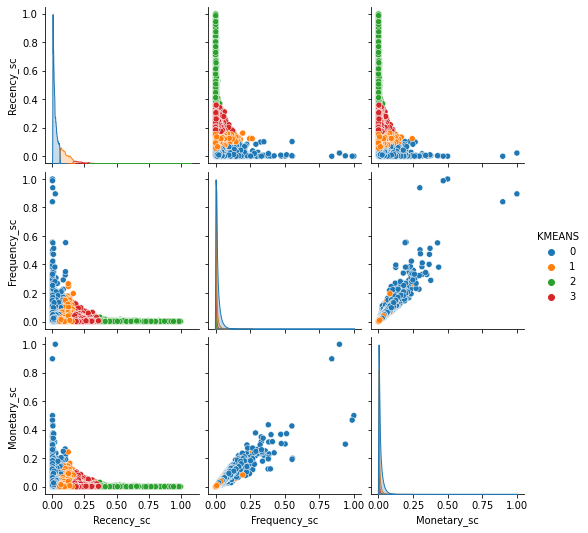

In [0]:
import seaborn as sns

#Monetary X Frequency -> Poucas avaliações e com notas baixas, e uma minoria que avalia frequetemente bem.

#Frequency X Recency -> Frequencia baixa com avaliações antigas e também recentes, e uma minoria com alta taxa de frequencia de avaliação com uma data da avaliação recente

#Monetary X Recency -> Maioria das avaliações recentes e antigas foram baixas.

sns.pairplot(df_pandas[['KMEANS','Recency_sc','Frequency_sc','Monetary_sc']],hue='KMEANS', palette='tab10')